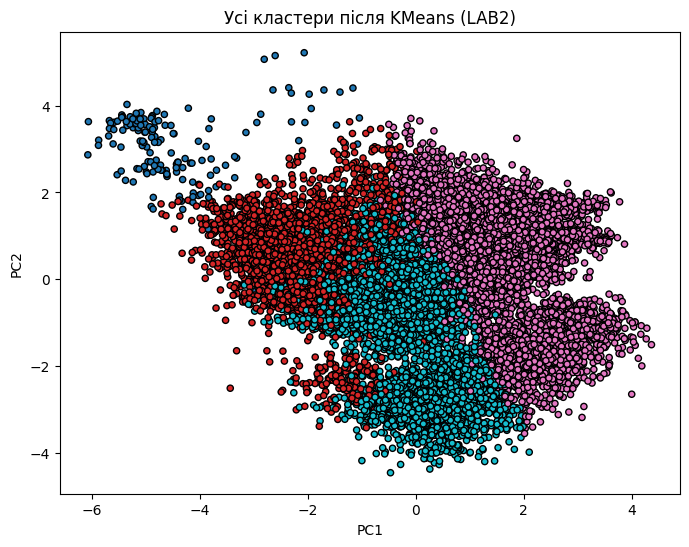

Два найбільші кластери: [2 3]


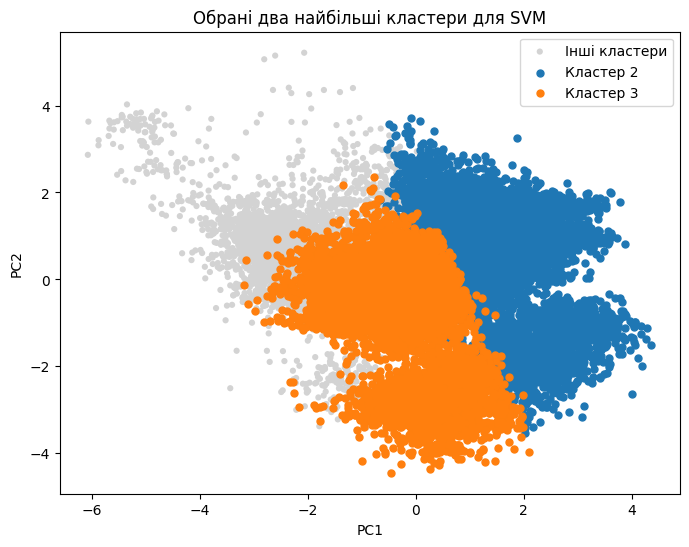

Точність класифікації: 0.9775


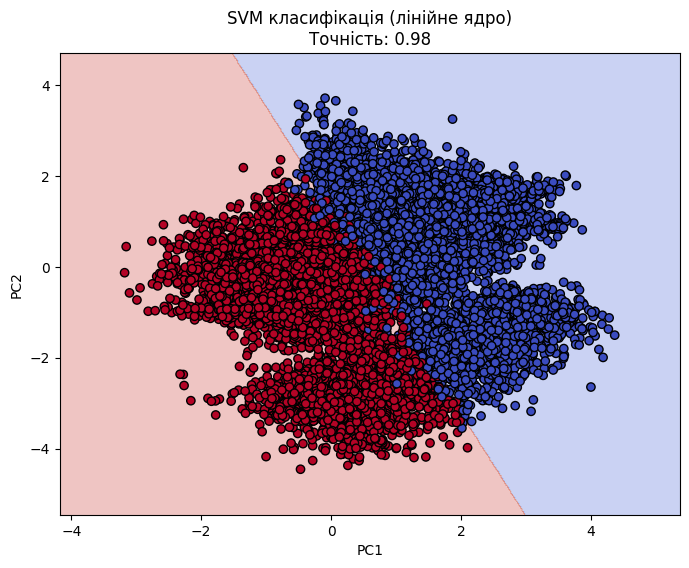

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Завантаження даних
file_path = r"C:\Users\anon\Downloads\adult\adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
adult = pd.read_csv(file_path, names=column_names, sep=", ", engine="python")

# Кодування категоріальних змінних
cat_cols = adult.select_dtypes(include="object").columns
for col in cat_cols:
    adult[col] = LabelEncoder().fit_transform(adult[col])

# Масштабування даних
scaler = StandardScaler()
adult_scaled = scaler.fit_transform(adult)

# Кластеризація
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
adult['kmeans_cluster'] = kmeans.fit_predict(adult_scaled)

# Зменшення розмірності для візуалізації
pca = PCA(n_components=2)
adult_pca = pca.fit_transform(adult_scaled)

# Візуалізація всіх кластерів
plt.figure(figsize=(8,6))
plt.scatter(adult_pca[:, 0], adult_pca[:, 1], c=adult['kmeans_cluster'], cmap='tab10', s=20, edgecolor='k')
plt.title("Усі кластери після KMeans (LAB2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Вибір двох найбільших кластерів
X = adult_pca
y = adult['kmeans_cluster'].values
unique, counts = np.unique(y, return_counts=True)
largest_clusters = unique[np.argsort(counts)[-2:]]
print("Два найбільші кластери:", largest_clusters)

# Візуалізація вибраних кластерів
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c='lightgray', s=20, label='Інші кластери', edgecolor='none')
for cluster in largest_clusters:
    mask = (y == cluster)
    plt.scatter(X[mask,0], X[mask,1], s=25, label=f'Кластер {cluster}')
plt.title("Обрані два найбільші кластери для SVM")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# Класифікація SVM
mask = np.isin(y, largest_clusters)
X_two = X[mask]
y_two = y[mask]
y_two = (y_two == largest_clusters[1]).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_two, y_two, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність класифікації: {accuracy:.4f}")

# Візуалізація результатів SVM
plt.figure(figsize=(8,6))
x_min, x_max = X_two[:, 0].min() - 1, X_two[:, 0].max() + 1
y_min, y_max = X_two[:, 1].min() - 1, X_two[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_two[:, 0], X_two[:, 1], c=y_two, cmap='coolwarm', edgecolor='k')
plt.title(f"SVM класифікація (лінійне ядро)\nТочність: {accuracy:.2f}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
